## Моделирование NVT ансамбля

   - Система: равновесная система $1372$ частиц, полученная путём нагревания системы из $7\times7\times7$ ГЦК решёток до температуры $T_i$;
   - Потенциал взаимодействия: Леннард-Джонс;
   - Ансамбль: $NVT$;
   - Начальная температура: $T_i = 1.3~\varepsilon / k_B$;
   - Конечная температура: $T_f = 10^{-4}~\varepsilon / k_B$;
   - Скорость нагревания: $v_T = 0.02~\varepsilon / k_B\tau$;
   - Термостат: масштабирование скоростей;
   - Толщина сферического слоя (список Верле): $\Delta r_s = 0.3~\sigma $;
   - Временной шаг: $\Delta t = 0.005~\tau$;
   - Число "неравновесных" итераций: $40000$;
   - Равновесные характеристики системы рассчитывалась через каждые $2000$ шагов;
   - Число шагов на уравновешивание системы при фиксированных внешних условиях: $M=10000$;
   - Число ансамблей $N=5000$;
   - Усреднение по ансамблям при фиксированных внешних условиях: $2N-1$ шагов (к первому ансамблю относятся шаги с $1$ по $N$ шаг, ко второму - с $2$ по $N+1$ и т. д.);
   - Функция радиального распределения вычислялась как среднее по времени за первые $N$ шагов;

#### Импорт необходимых библиотек

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.dirname(sys.path[0]))

import scripts.constants as con
from scripts.postprocessing import PostProcessor

#### Настройки графиков

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.figsize'] = [i / 2.54 for i in (15, 15)]
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['mathtext.it'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.labelsize'] = 14

#### Путь к файлам с данными

In [3]:
CURRENT_DATA = '2021-09-23'
DIR_POSTFIX = ''
# DIR_POSTFIX = '_cooling_from_prepared_1.3_normal'
PLOT_FILENAME_POSTFIX = 'cooling_from_prepared_1.3_normal'

In [4]:
PATH_TO_CURRENT_DATA = os.path.join(con.PATH_TO_DATA, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_DATA

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\data\\2021-09-23'

In [5]:
PATH_TO_CURRENT_PLOTS = os.path.join(con.PATH_TO_PLOTS, f'{CURRENT_DATA}{DIR_POSTFIX}')
PATH_TO_CURRENT_PLOTS

'C:\\Users\\farhutdinov.a\\Documents\\Albert\\git_reps\\molecular_dynamics\\plots\\2021-09-23'

#### Параметры системы, при которых были подчитаны функции радиального распределения, среднеквадратичные смещения и т.д.

In [6]:
setups = []
for filename in os.listdir(PATH_TO_CURRENT_DATA):
    if filename.startswith('rdf'):
        parts = filename.split('_')
        setup = {
            'temperature': float(parts[2]), 
            'pressure': float(parts[4]), 
            'heating_velocity': float(parts[6]) if 'HV' in parts else None,
            
        }
        if setup['heating_velocity'] == 0.02:
            setups.append(setup)
        
setups

[{'temperature': 1e-05, 'pressure': -0.55753, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56503, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56587, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56641, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56833, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56834, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56835, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.56841, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.5851, 'heating_velocity': 0.02},
 {'temperature': 1e-05, 'pressure': -0.61585, 'heating_velocity': 0.02},
 {'temperature': 0.10049, 'pressure': -0.53846, 'heating_velocity': 0.02},
 {'temperature': 0.30014, 'pressure': -0.39415, 'heating_velocity': 0.02},
 {'temperature': 0.49911, 'pressure': -0.42679, 'heating_velocity': 0.02},
 {'temperature': 0.70108, 'pressure': 0.10007,

#### Инициализация объекта для обработки данных и вывод таблицы значений функции радиального распределения

In [7]:
pp = PostProcessor(
    path_to_data=PATH_TO_CURRENT_DATA, 
    path_to_plots=PATH_TO_CURRENT_PLOTS, 
    plot_filename_postfix=PLOT_FILENAME_POSTFIX, 
    setups=setups,
)
pp.rdf.data

,radius,setup_0,setup_1,setup_2,setup_3,setup_4,setup_5,setup_6,setup_7,setup_8,setup_9,setup_10,setup_11,setup_12,setup_13,setup_14,setup_15,setup_16
0,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,6.08,0.977760,0.975629,0.972504,0.980251,0.980625,0.981470,0.982532,0.979585,0.943591,0.966999,0.960918,0.969131,1.000358,0.996119,1.021075,0.983327,0.981203
608,6.09,0.939562,0.944036,0.947855,0.939231,0.940184,0.941110,0.935092,0.936665,0.972009,0.963946,0.961437,0.957230,0.976953,1.007582,0.987753,0.993347,1.014598
609,6.10,0.924931,0.924282,0.927658,0.926066,0.929226,0.926629,0.926773,0.933238,0.957416,0.960474,0.974510,0.951365,0.967241,1.006142,0.993165,1.008574,1.004391
610,6.11,0.932098,0.936606,0.926685,0.936460,0.934984,0.936279,0.937651,0.933179,0.971092,0.948932,0.978021,0.957471,0.987039,0.988609,0.989159,1.002651,1.005552


In [8]:
pp.rdf.data.sum()

radius      1875.780000
setup_0      602.230926
setup_1      602.233735
setup_2      602.223912
setup_3      602.227559
setup_4      602.229851
setup_5      602.227950
setup_6      602.234452
setup_7      602.236787
setup_8      603.137061
setup_9      602.936030
setup_10     600.328424
setup_11     589.094916
setup_12     561.030650
setup_13     539.001042
setup_14     539.041665
setup_15     539.292070
setup_16     539.417761
dtype: float64

#### Графики функций радиального распределения $g(\textbf{r})$ при различных температурах

$$g(\textbf{r})=\dfrac{V}{N^2}\left<\sum_{i}{\sum_{j\ne i}{\delta(\textbf{r}-\textbf{r}_{ij})}}\right>$$

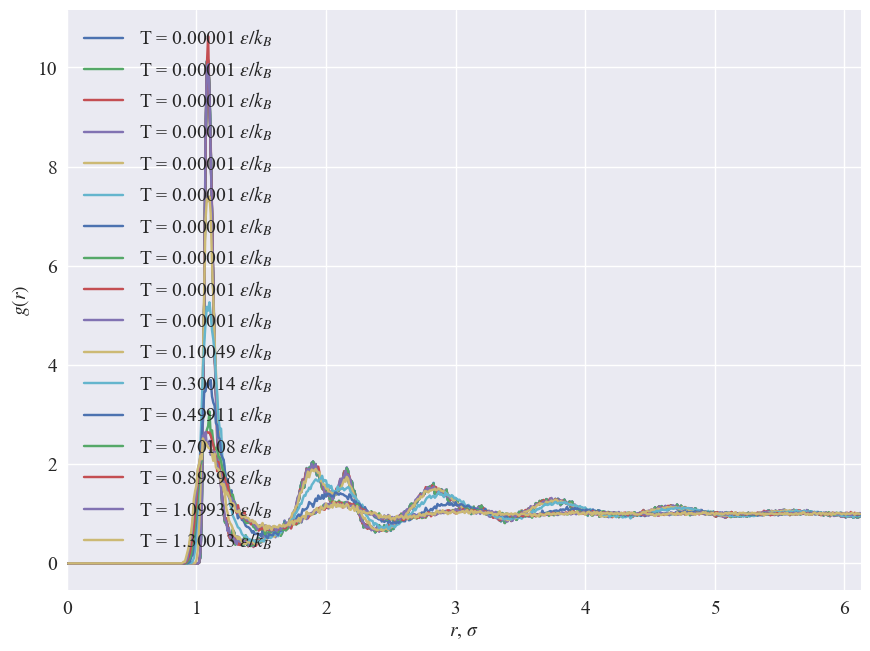

In [9]:
pp.plot_rdf(
    figsize=(10.24, 7.68),
#     shift=0.5,
    left=0,
    right=6.125,
#     bottom=0, 
#     top=20,
)

#### Временная зависимость среднеквадратичного смещения $\left<\Delta r^2(t)\right>$ при различных температурах

$$\left<\Delta r^2(t)\right>=\dfrac{1}{N}\sum_{i=1}^{N}{\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2}$$

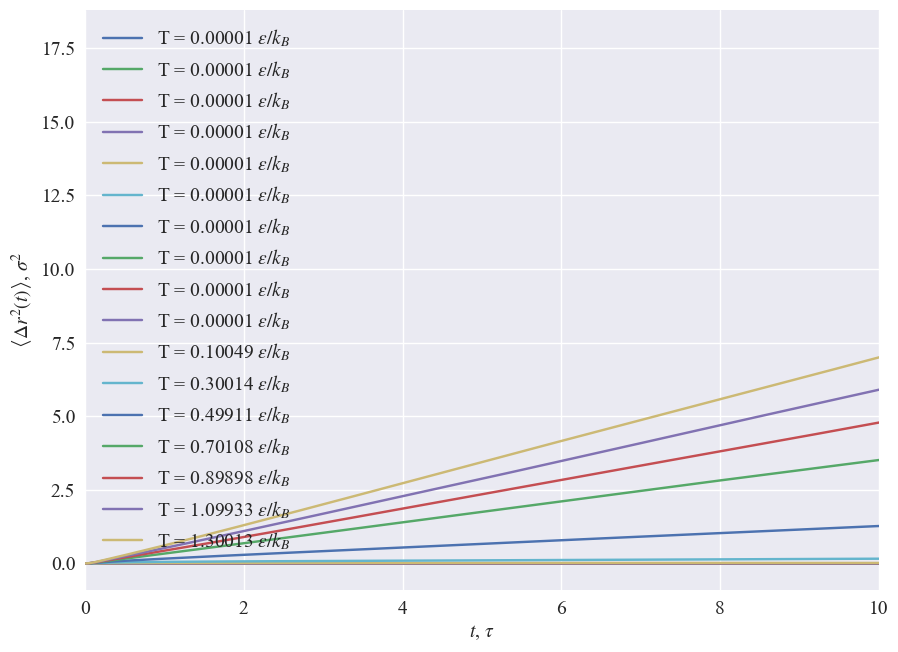

In [10]:
pp.plot_msd(
    figsize=(10.24, 7.68),
    left=0,
    right=10,
#     bottom=1e-9, 
#     top=1e2,
#     y_scale='log',
)

#### Временная зависимость автокорреляционнной функции скорости $\Psi(t)$ при различных температурах

$$\Psi(t) = \dfrac{1}{N}\left<\sum_{j=1}^N{\vec{v}_j(t)\vec{v}_j(0)}\right>$$

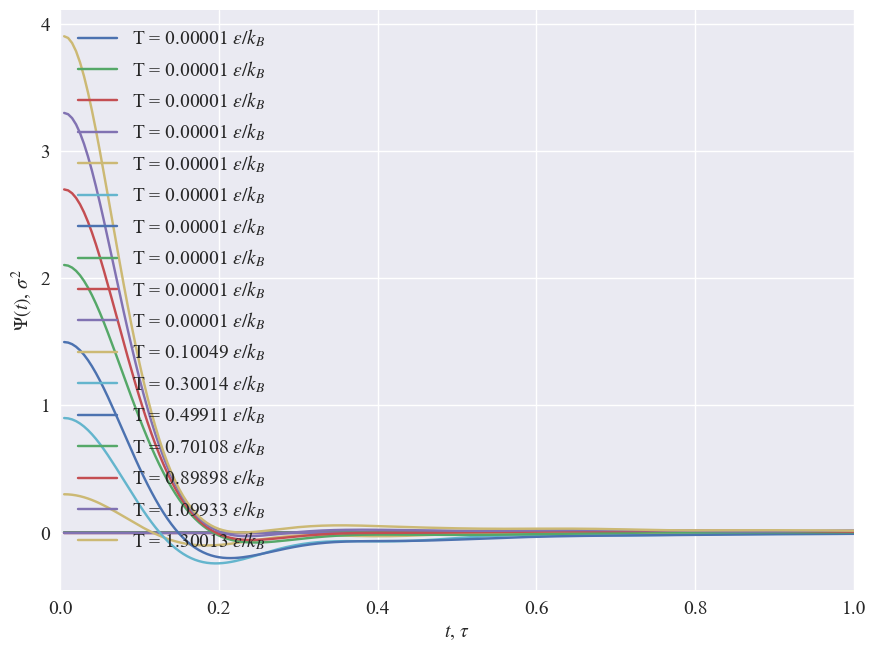

In [11]:
pp.plot_vaf(
    figsize=(10.24, 7.68),
    left=0,
    right=1,
#     bottom=-2,
#     top=10,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Эйнштейна, при различных температурах

$$D_E(t)=\dfrac{\left<\left<\Delta r^2\right>\right>}{6t}=\dfrac{1}{6tN}\left<\sum_{i=1}^{N}\left|\textbf{r}_i(t)-\textbf{r}_i(0)\right|^2\right>$$

$$D=\lim_{t\rightarrow\infty}{D_E(t)}$$

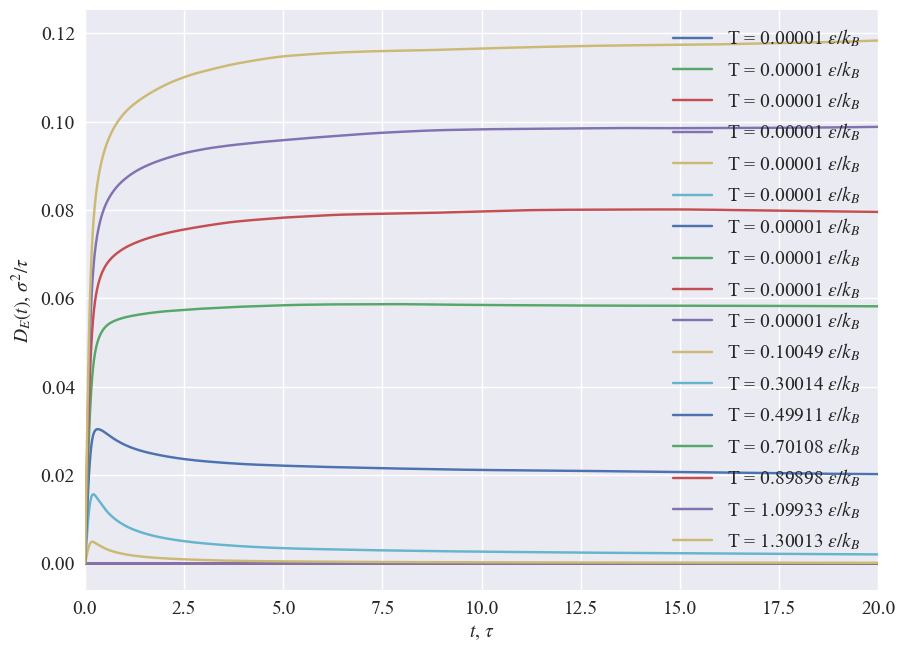

In [12]:
pp.plot_einstein_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
#     bottom=0, 
#     top=0.3,
)

#### Временная зависимость коэффициента самодиффузии $D$, вычисленного через соотношение Грина-Кубо, при различных температурах

$$D_{GK}(t)=\dfrac{1}{3}\int_{0}^{t}{\Psi(\tau)d\tau}=\dfrac{1}{3N}\int_{0}^{t}{\left<\sum_{j=1}^N{\vec{v}_j(\tau)\vec{v}_j(0)}\right>d\tau}$$

$$D=\lim_{t\rightarrow\infty}{D_{GK}(t)}$$

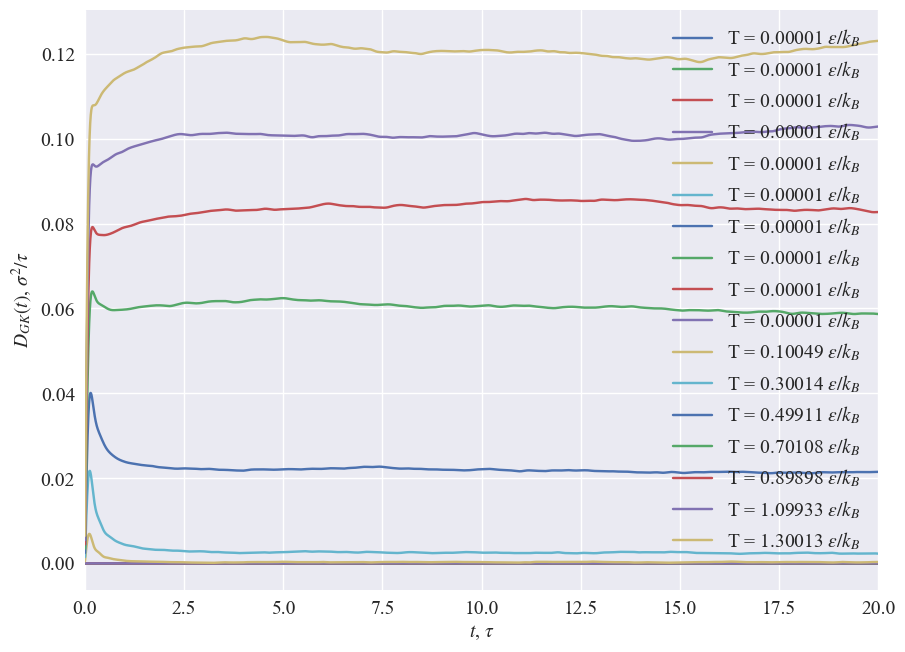

In [13]:
pp.plot_gk_diffusion(
    figsize=(10.24, 7.68),
    left=0,
    right=20,
#     bottom=0, 
#     top=0.3,
)

#### Температурная зависимость коэффициентов самодиффузии, вычисленных через соотношения Эйнштейна

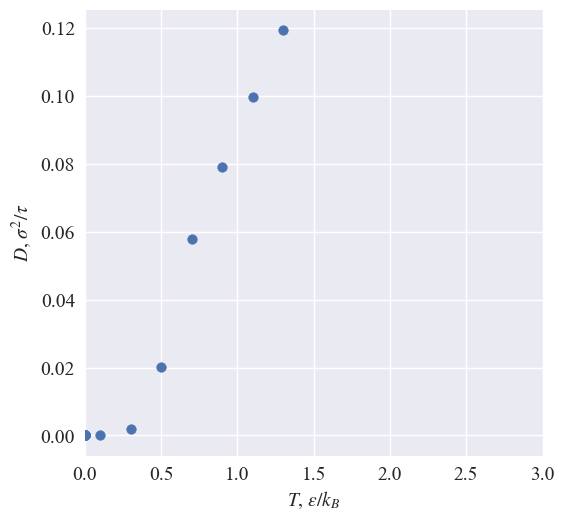

In [14]:
pp.plot_diffusion(
    figsize=(10.24, 7.68),
    left=0, 
    right=3,
#     bottom=0, 
#     top=0.3,
)

#### Таблица временных зависимостей характеристик системы

In [15]:
if 'time' not in pp.system_parameters.columns:
    pp.system_parameters['time'] = (pp.system_parameters.index + 1) * 0.005
pp.system_parameters = pp.system_parameters[39:].reset_index(drop=True)

pp.system_parameters = pp.system_parameters[pp.system_parameters['volume'] != 0.0]
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume
0,200.200,1.29972,1.60053,2672.98070,-6241.5860,-3568.6052,3480.6128,0.0,0.0,1838.2656
1,200.205,1.29953,1.59124,2672.26000,-6246.7607,-3574.5007,3430.8276,0.0,0.0,1838.2656
2,200.210,1.29923,1.58400,2670.86280,-6250.8740,-3580.0112,3393.7120,0.0,0.0,1838.2656
3,200.215,1.29869,1.57936,2668.33130,-6252.9775,-3584.6462,3373.1910,0.0,0.0,1838.2656
4,200.220,1.29783,1.57938,2664.59080,-6251.1025,-3586.5117,3380.8013,0.0,0.0,1838.2656
...,...,...,...,...,...,...,...,...,...,...
35956,379.980,0.00001,-0.56833,0.02174,-9451.4280,-9451.4060,-3134.2683,0.0,0.0,1838.2656
35957,379.985,0.00011,-0.56828,0.23054,-9451.4390,-9451.2090,-3134.4165,0.0,0.0,1838.2656
35958,379.990,0.00001,-0.56836,0.02181,-9451.4410,-9451.4200,-3134.4348,0.0,0.0,1838.2656
35959,379.995,0.00011,-0.56828,0.23014,-9451.4390,-9451.2090,-3134.3845,0.0,0.0,1838.2656


#### Зависимость объёма системы от времени

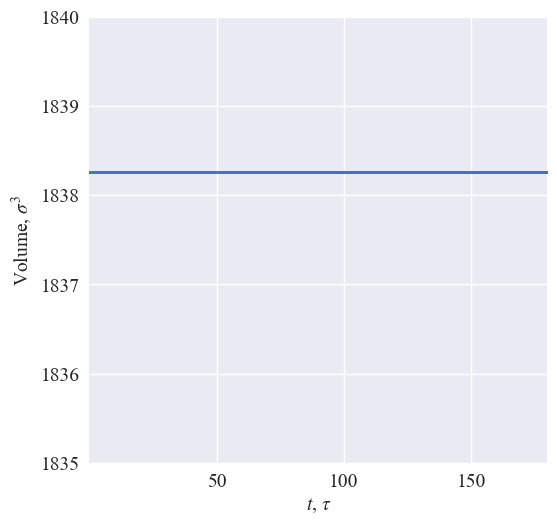

In [16]:
pp.plot_system_parameters(
    column_names=['volume',],
    y_label=r'Volume, $\sigma ^ 3$',
    bottom=1835,
    top=1840,
);

#### Зависимость температуры системы от времени

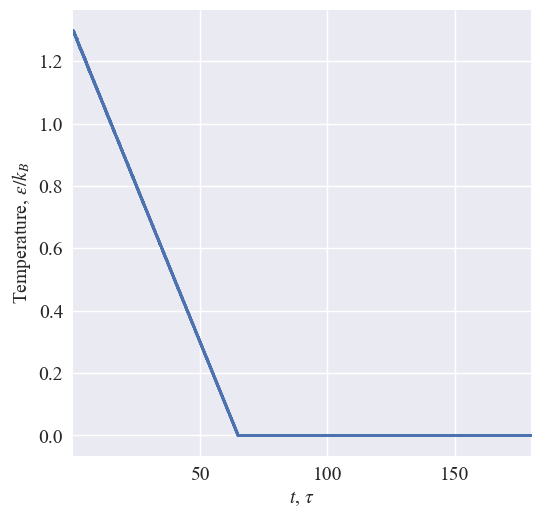

In [17]:
pp.plot_system_parameters(
    column_names=['temperature',],
    y_label=r'Temperature, $\epsilon / k_B$',
#     bottom=0,
#     top=3,
);

#### Зависимость давления системы от времени

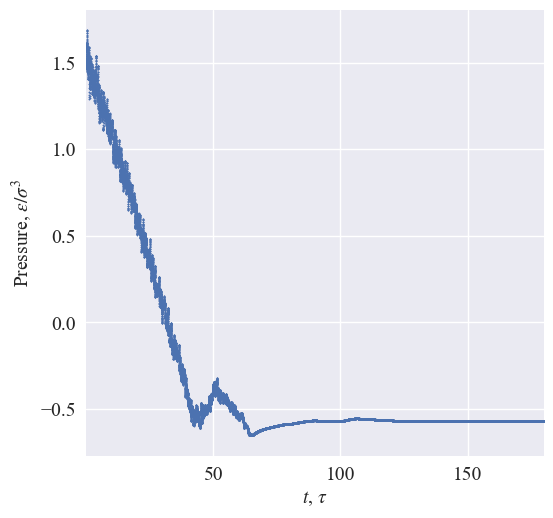

In [18]:
pp.plot_system_parameters(
    column_names=['pressure',],
    y_label=r'Pressure, $\epsilon / \sigma^3 $',
#     bottom=-3,
#     top=5,
);

#### Зависимость кинетической, потенциальной  и полной (внутренней) энергии системы от времени

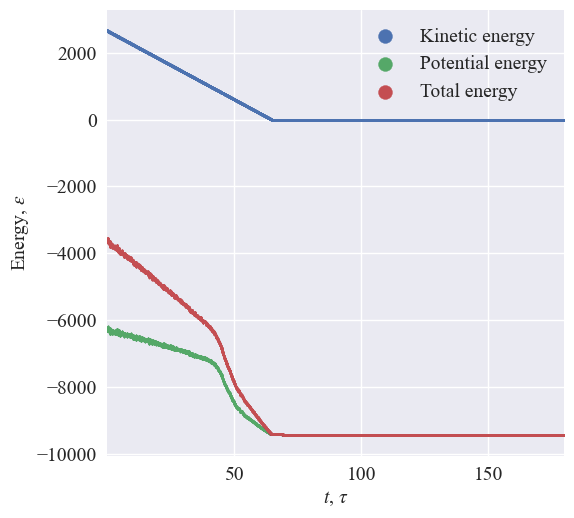

In [19]:
pp.plot_system_parameters(
    column_names=['kinetic_energy', 'potential_energy', 'total_energy'],
    y_label=r'Energy, $\epsilon$',
#     bottom=-10000,
#     top=8000,
    file_name_prefix='all_energies',
);

#### Вычисление термодинамических функций

In [20]:
pp.get_enthalpy();

In [21]:
pp.get_entropy();

In [22]:
pp.get_free_energy();

In [23]:
pp.get_gibbs_energy();

In [24]:
pp.system_parameters

,time,temperature,pressure,kinetic_energy,potential_energy,total_energy,virial,msd,diffusion,volume,enthalpy,entropy,free_energy,gibbs_energy
0,200.200,1.29972,1.60053,2672.98070,-6241.5860,-3568.6052,3480.6128,0.0,0.0,1838.2656,0.000000,0.000000e+00,0.000000,0.000000
1,200.205,1.29953,1.59124,2672.26000,-6246.7607,-3574.5007,3430.8276,0.0,0.0,1838.2656,-22.972987,-4.536640e+00,-0.000862,-17.078349
2,200.210,1.29923,1.58400,2670.86280,-6250.8740,-3580.0112,3393.7120,0.0,0.0,1838.2656,-41.792530,-8.777999e+00,-0.003495,-30.390026
3,200.215,1.29869,1.57936,2668.33130,-6252.9775,-3584.6462,3373.1910,0.0,0.0,1838.2656,-54.957083,-1.234698e+01,-0.010163,-38.926245
4,200.220,1.29783,1.57938,2664.59080,-6251.1025,-3586.5117,3380.8013,0.0,0.0,1838.2656,-56.785817,-1.378438e+01,-0.022017,-38.901335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35956,379.980,0.00001,-0.56833,0.02174,-9451.4280,-9451.4060,-3134.2683,0.0,0.0,1838.2656,-9869.741529,-2.194378e+08,-29952.560283,-33939.501013
35957,379.985,0.00011,-0.56828,0.23054,-9451.4390,-9451.2090,-3134.4165,0.0,0.0,1838.2656,-9869.452616,-2.194360e+08,-8008.960070,-11995.808886
35958,379.990,0.00001,-0.56836,0.02181,-9451.4410,-9451.4200,-3134.4348,0.0,0.0,1838.2656,-9869.810677,-2.194571e+08,-29954.670283,-33941.666160
35959,379.995,0.00011,-0.56828,0.23014,-9451.4390,-9451.2090,-3134.3845,0.0,0.0,1838.2656,-9869.452616,-2.194552e+08,-8009.151888,-11996.000704


#### Зависимость энтропии системы от времени

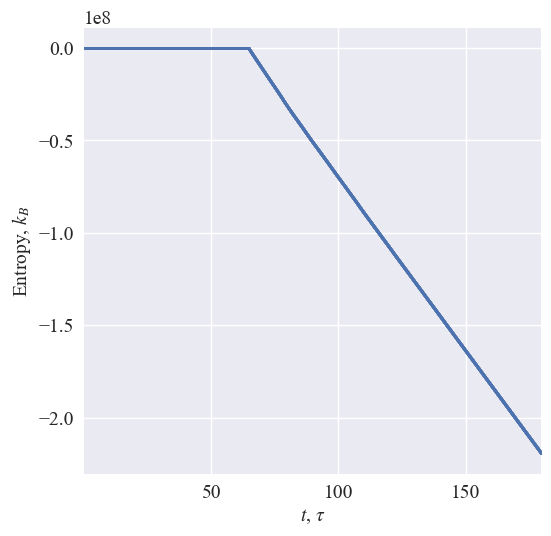

In [25]:
pp.plot_system_parameters(
    column_names=['entropy', ],
    y_label=r'Entropy, $k_B$',
#     bottom=-2,
#     top=2,
);

#### Зависимость энтальпии, внутренней энергии, свободной энергии Гельмгольца и энергии Гиббса от времени

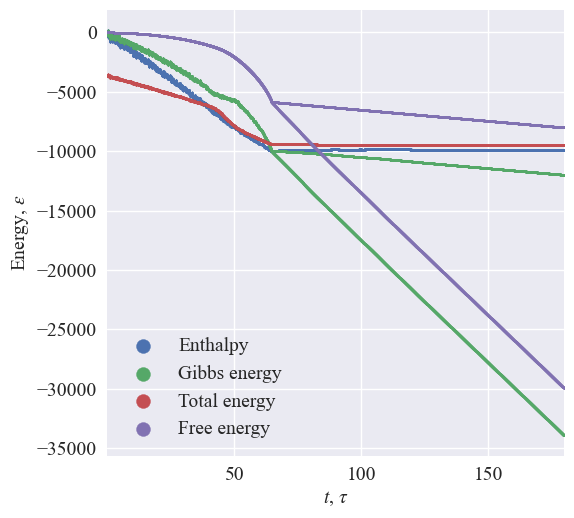

In [26]:
pp.plot_system_parameters(
    column_names=[
        'enthalpy', 
        'gibbs_energy', 
        'total_energy', 
        'free_energy',
    ],
    y_label=r'Energy, $\epsilon$',
    file_name_prefix='all_thermodynamic_functions',
#     bottom=100,
#     top=2000,
);

#### Зависимость внутренней энергии системы от энтропии

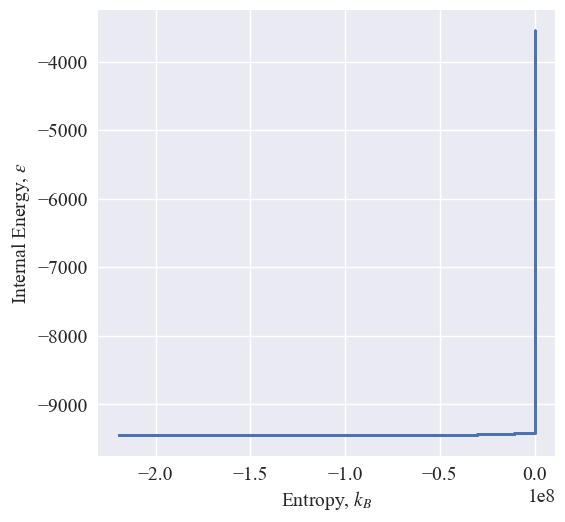

In [27]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость внутренней энергии системы от объёма

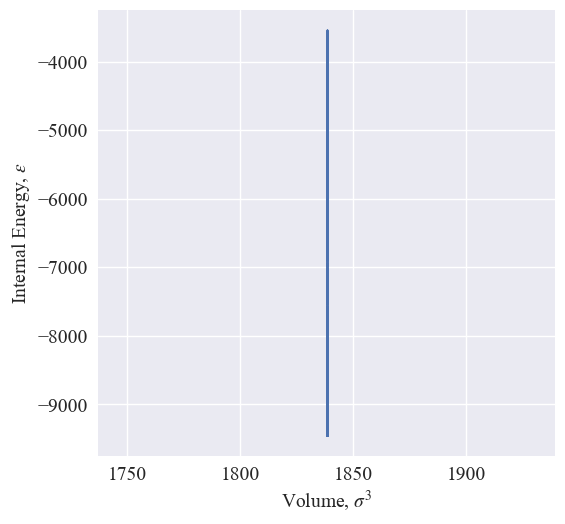

In [28]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['total_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Internal Energy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от энтропии

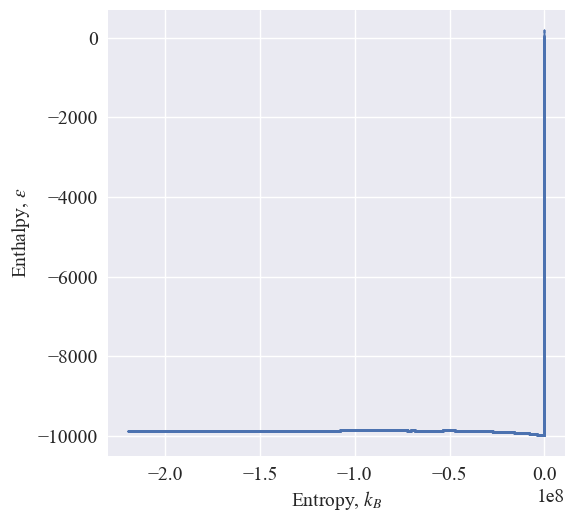

In [29]:
plt.scatter(pp.system_parameters['entropy'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Entropy, $k_B $',)
plt.ylabel(r'Enthalpy, $\epsilon$',)
plt.show();

#### Зависимость энтальпии системы от давления

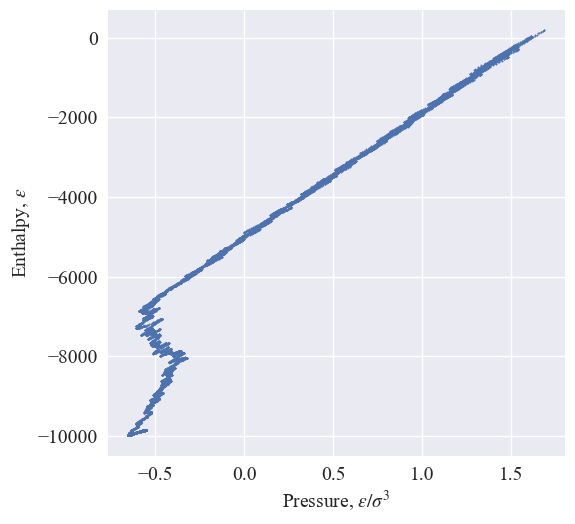

In [30]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['enthalpy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Enthalpy, $\epsilon$')
plt.show();

#### Зависимость свободной энергии Гельмгольца от объёма системы

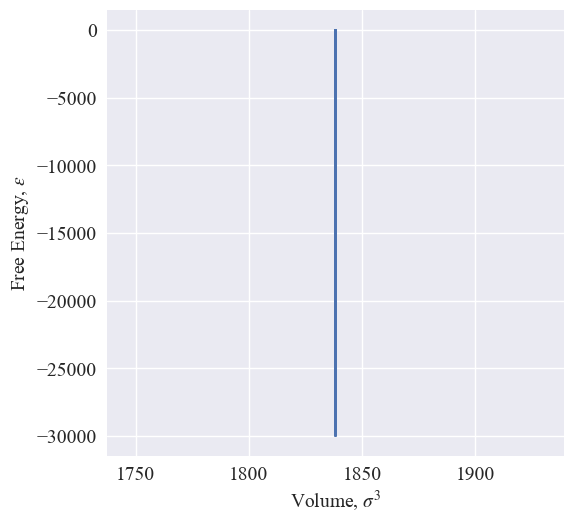

In [31]:
plt.scatter(pp.system_parameters['volume'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Volume, $\sigma^3 $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость свободной энергии Гельмгольца от температуры системы

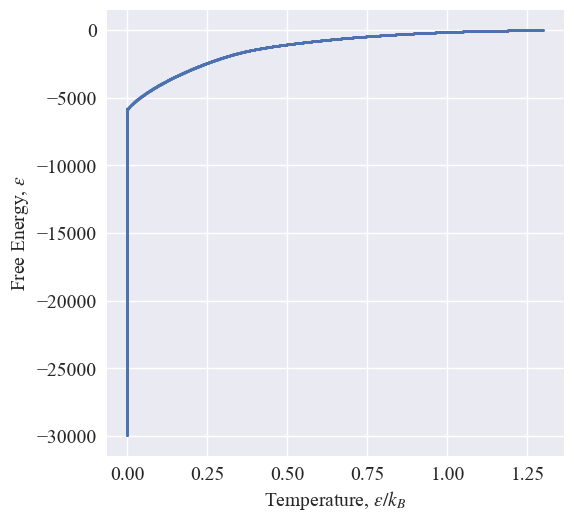

In [32]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['free_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Free Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от температуры системы

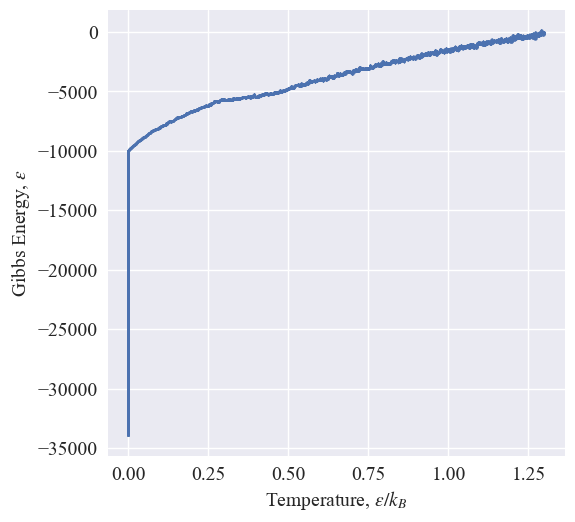

In [33]:
plt.scatter(pp.system_parameters['temperature'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Temperature, $\epsilon/k_B $',)
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

#### Зависимость энергии Гиббса от давления системы

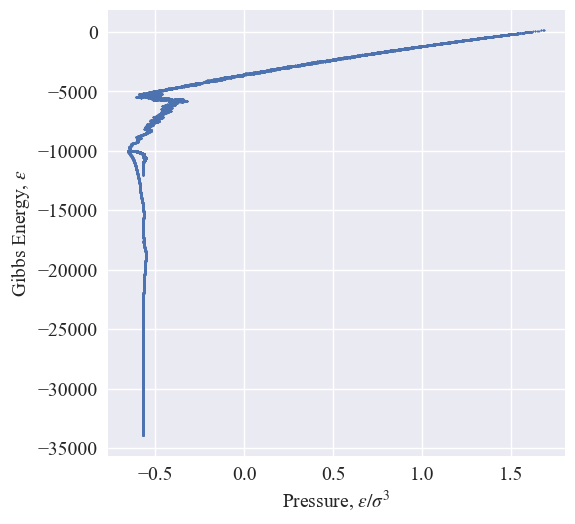

In [34]:
plt.scatter(pp.system_parameters['pressure'], pp.system_parameters['gibbs_energy'], s=1);
plt.xlabel(r'Pressure, $\epsilon / \sigma^3 $')
plt.ylabel(r'Gibbs Energy, $\epsilon$',)
plt.show();

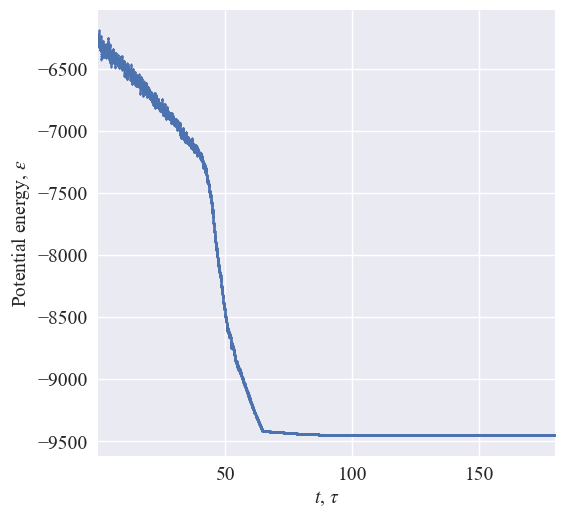

In [35]:
pp.plot_system_parameters(
    column_names=['potential_energy',],
    y_label=r'Potential energy, $\epsilon$',
);